<a href="https://colab.research.google.com/github/samer-glitch/Predicting-Diabetes-and-Assessing-Risk-levels-for-retinopathy-disease-Using-ML/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


In [3]:
import pandas as pd

# Load the dataset to perform EDA
data_path = 'diabetes_prediction_dataset.csv'
diabetes_data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Display the first few rows of the dataset and the summary information
diabetes_data.info()
print()
diabetes_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB



,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
# Check for any missing values in the dataset
missing_values = diabetes_data.isnull().sum()

# Check for any duplicates in the dataset
duplicate_rows = diabetes_data.duplicated().sum()

# Checking for any illogical or inconsistent data entries such as negative values for 'age', 'bmi', 'HbA1c_level', 'blood_glucose_level'
negative_values_check = {
    'negative_age': (diabetes_data['age'] < 0).any(),
    'negative_bmi': (diabetes_data['bmi'] < 0).any(),
    'negative_HbA1c_level': (diabetes_data['HbA1c_level'] < 0).any(),
    'negative_blood_glucose_level': (diabetes_data['blood_glucose_level'] < 0).any()
}

missing_values, duplicate_rows, negative_values_check


(gender                 0
 age                    0
 hypertension           0
 heart_disease          0
 smoking_history        0
 bmi                    0
 HbA1c_level            0
 blood_glucose_level    0
 diabetes               0
 dtype: int64,
 3854,
 {'negative_age': False,
  'negative_bmi': False,
  'negative_HbA1c_level': False,
  'negative_blood_glucose_level': False})

In [6]:
# Check for and remove duplicates
initial_count = diabetes_data.shape[0]
print("initial_count",initial_count)
# Check for duplicate rows
duplicate_rows = diabetes_data.duplicated().sum()

# If duplicates exist, remove them
if duplicate_rows > 0:
    diabetes_data = diabetes_data.drop_duplicates()

duplicate_rows


# Check the unique values for categorical variables to ensure consistency
unique_genders = diabetes_data['gender'].unique()
unique_smoking_statuses = diabetes_data['smoking_history'].unique()

print (unique_genders)
print (unique_smoking_statuses)
# Removing duplicate rows
diabetes_data_cleaned = diabetes_data.drop_duplicates()

# Verify the removal of duplicates
remaining_duplicates = diabetes_data_cleaned.duplicated().sum()

# Proceed to exploratory data analysis
remaining_duplicates

final_count = diabetes_data.shape[0]

initial_count 100000
['Female' 'Male' 'Other']
['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [7]:
print("duplicate_rows",duplicate_rows)
print("remaining_duplicates",remaining_duplicates)
print("final_count",final_count)

duplicate_rows 3854
remaining_duplicates 0
final_count 96146


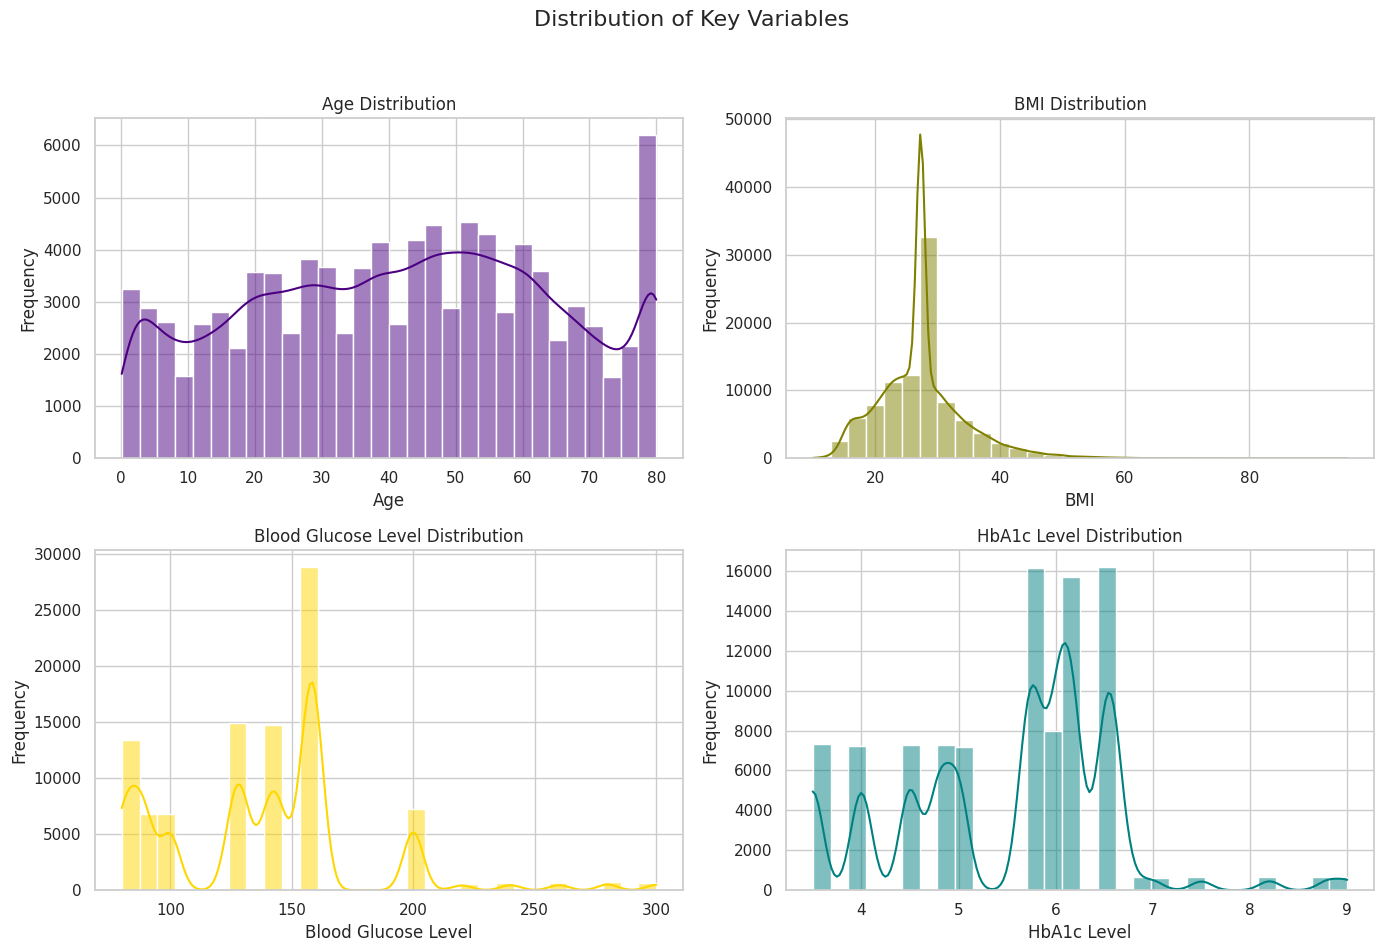

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure to hold the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Key Variables', fontsize=16)

# Plotting distributions
sns.histplot(diabetes_data_cleaned['age'], bins=30, kde=True, color="indigo", ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(diabetes_data_cleaned['bmi'], bins=30, kde=True, color="olive", ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(diabetes_data_cleaned['blood_glucose_level'], bins=30, kde=True, color="gold", ax=axes[1, 0])
axes[1, 0].set_title('Blood Glucose Level Distribution')
axes[1, 0].set_xlabel('Blood Glucose Level')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(diabetes_data_cleaned['HbA1c_level'], bins=30, kde=True, color="teal", ax=axes[1, 1])
axes[1, 1].set_title('HbA1c Level Distribution')
axes[1, 1].set_xlabel('HbA1c Level')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplots to fit in figure area
plt.show()


<ipython-input-9-47448abef3ad>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


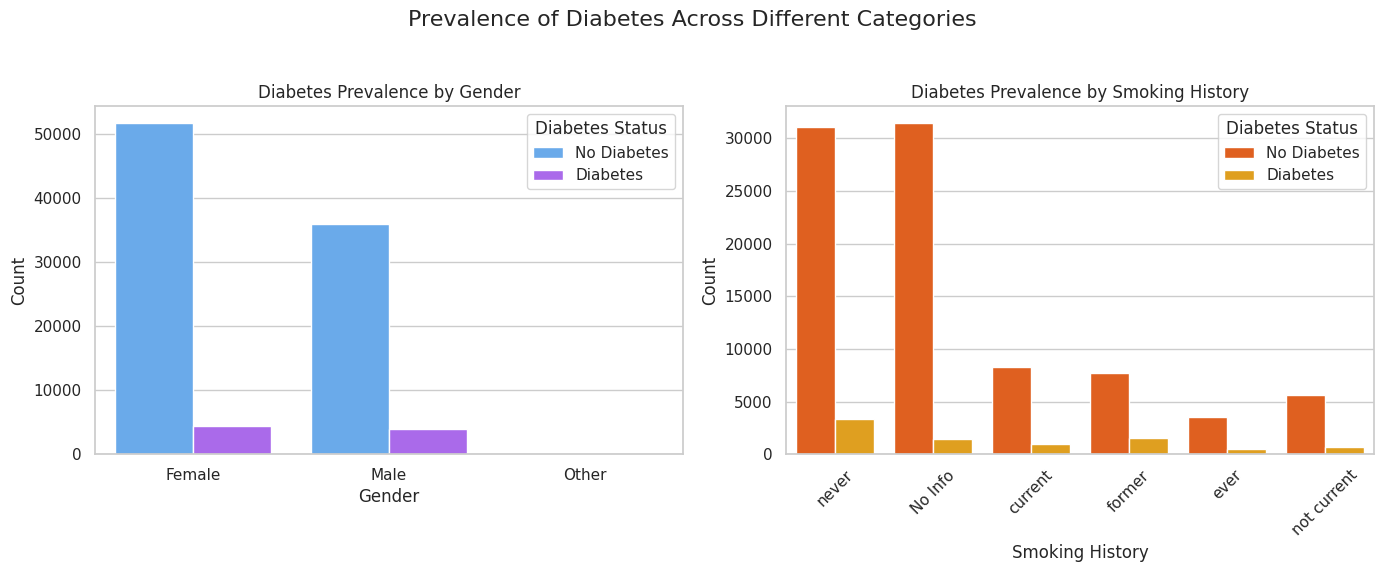

In [9]:
# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Prevalence of Diabetes Across Different Categories', fontsize=16)

# Bar plot for diabetes prevalence by gender
sns.countplot(x='gender', hue='diabetes', data=diabetes_data_cleaned, palette='cool', ax=axes[0])
axes[0].set_title('Diabetes Prevalence by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])

# Bar plot for diabetes prevalence by smoking history
sns.countplot(x='smoking_history', hue='diabetes', data=diabetes_data_cleaned, palette='autumn', ax=axes[1])
axes[1].set_title('Diabetes Prevalence by Smoking History')
axes[1].set_xlabel('Smoking History')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplots to fit in figure area
plt.show()


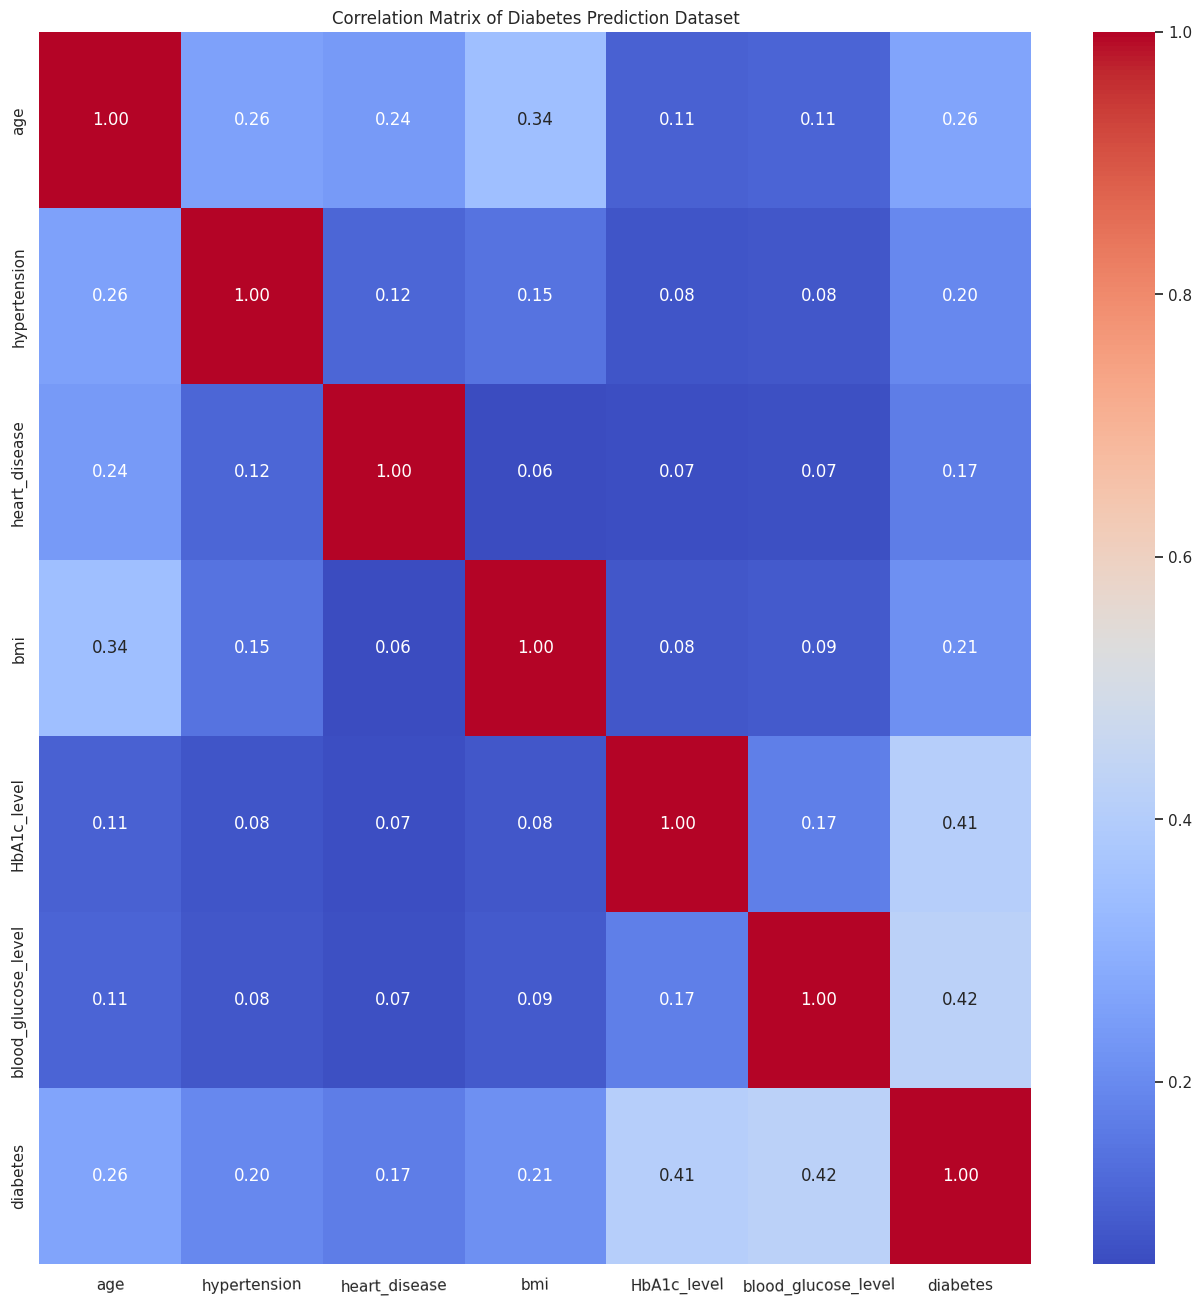

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix excluding non-numeric columns
numeric_data = diabetes_data_cleaned.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()

# Plotting the heatmap with adjusted x-axis labels
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Adjusting x-axis labels to 20 degrees
plt.xticks(rotation=1)
plt.title('Correlation Matrix of Diabetes Prediction Dataset')
plt.show()


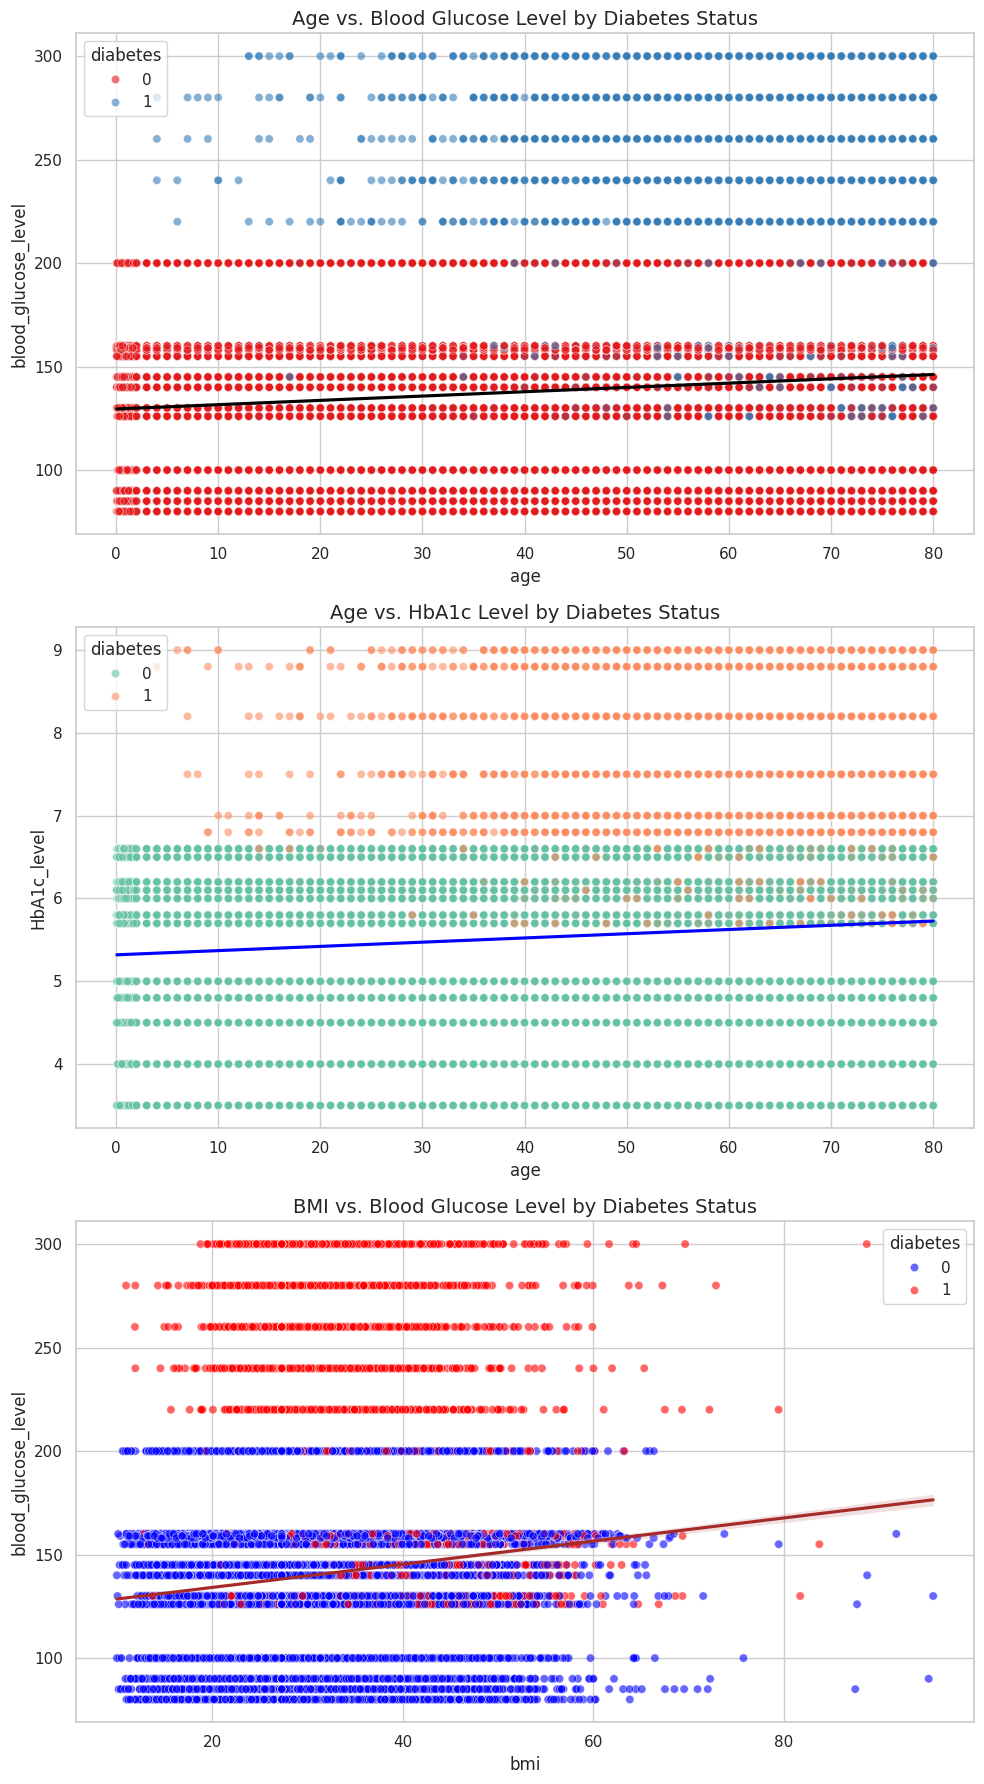

In [11]:
# Create scatter plots with regression lines for key relationships segmented by diabetes status
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Age vs. Blood Glucose Level
sns.scatterplot(x='age', y='blood_glucose_level', hue='diabetes', data=diabetes_data_cleaned, ax=axes[0], palette='Set1', alpha=0.6)
sns.regplot(x='age', y='blood_glucose_level', scatter=False, data=diabetes_data_cleaned, ax=axes[0], color='black')
axes[0].set_title('Age vs. Blood Glucose Level by Diabetes Status', fontsize=14)

# Age vs. HbA1c Level
sns.scatterplot(x='age', y='HbA1c_level', hue='diabetes', data=diabetes_data_cleaned, ax=axes[1], palette='Set2', alpha=0.6)
sns.regplot(x='age', y='HbA1c_level', scatter=False, data=diabetes_data_cleaned, ax=axes[1], color='blue')
axes[1].set_title('Age vs. HbA1c Level by Diabetes Status', fontsize=14)

# BMI vs. Blood Glucose Level
sns.scatterplot(x='bmi', y='blood_glucose_level', hue='diabetes', data=diabetes_data_cleaned, ax=axes[2], palette=['blue', 'red'], alpha=0.6)
sns.regplot(x='bmi', y='blood_glucose_level', scatter=False, data=diabetes_data_cleaned, ax=axes[2], color='brown')
axes[2].set_title('BMI vs. Blood Glucose Level by Diabetes Status', fontsize=14)

plt.tight_layout()
plt.show()


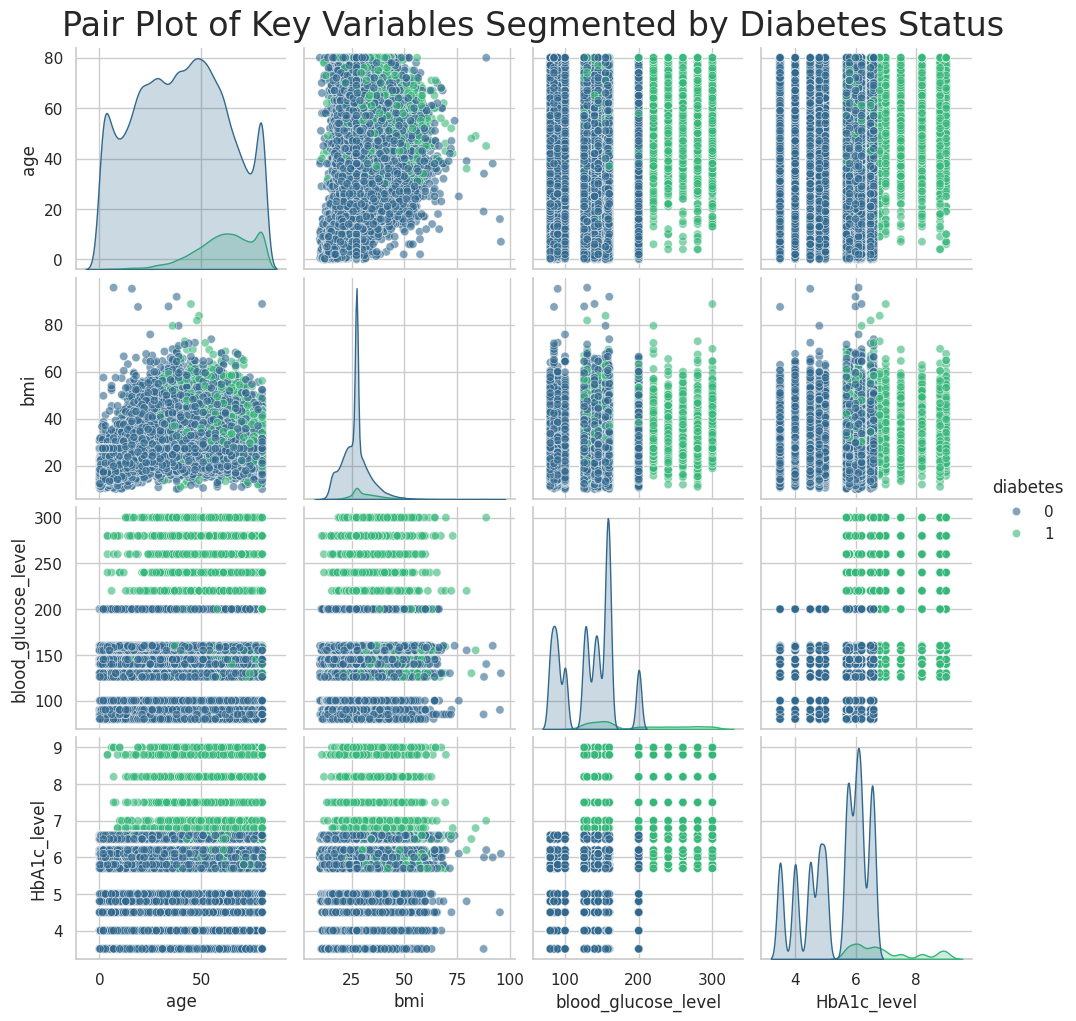

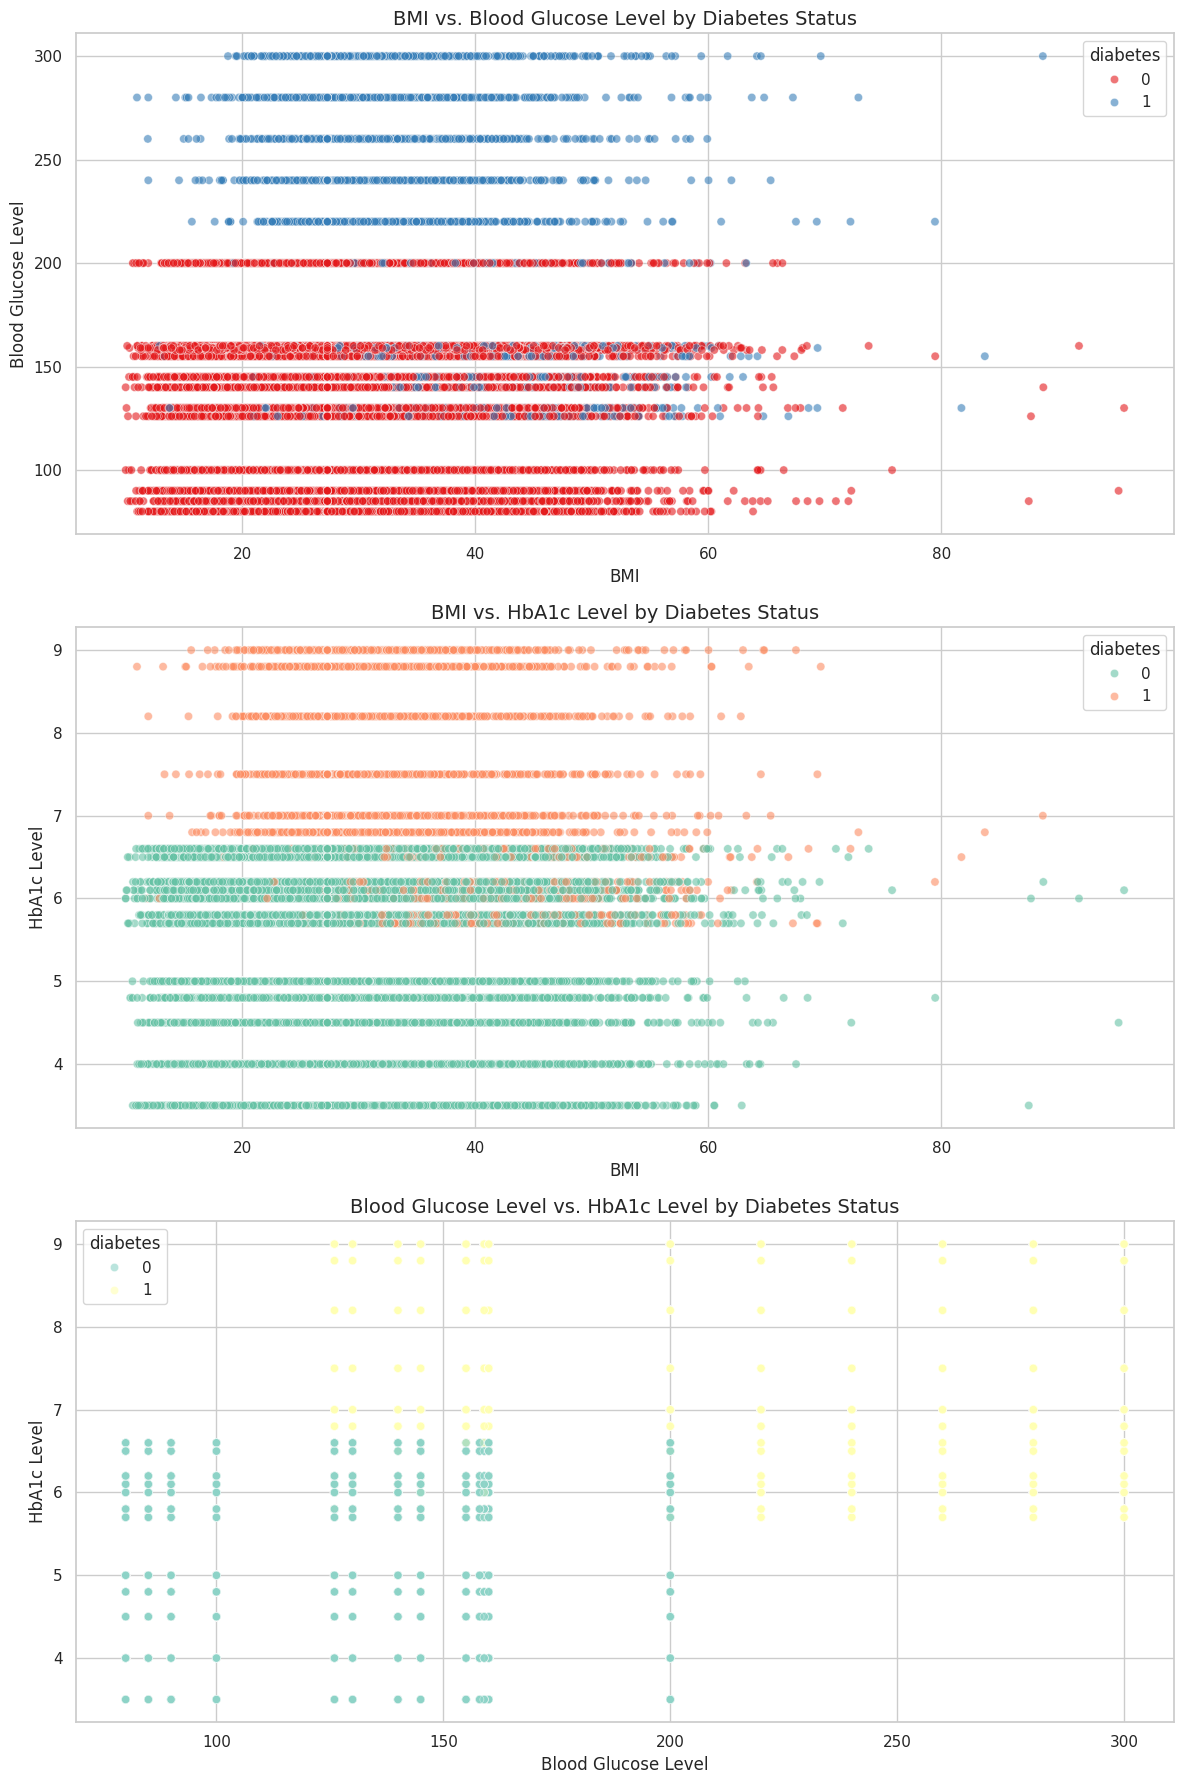

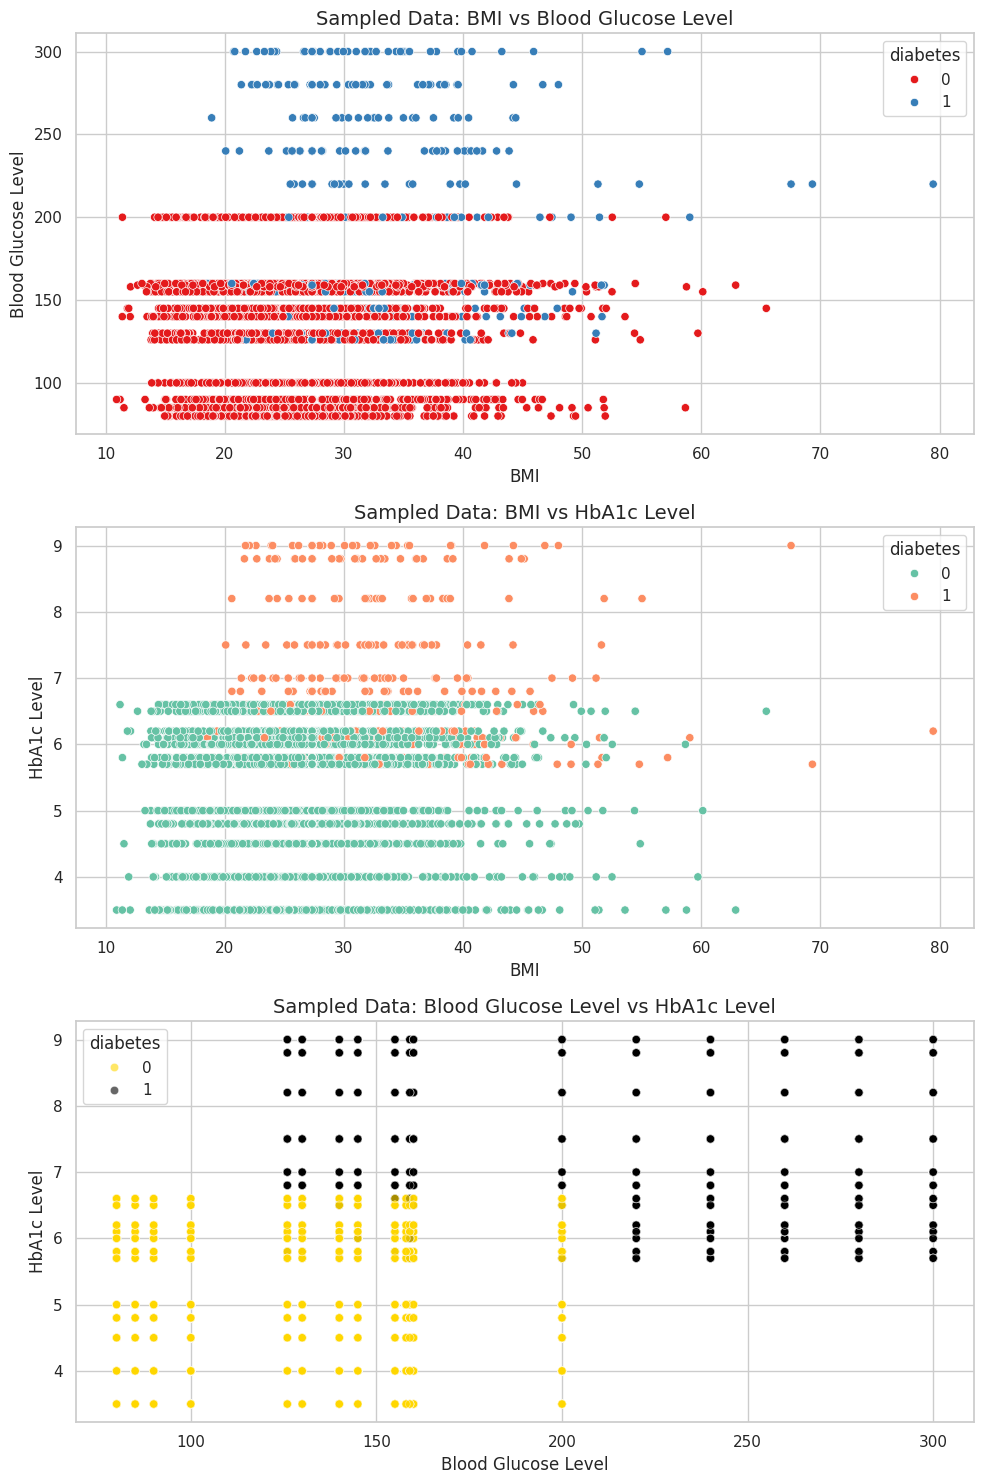

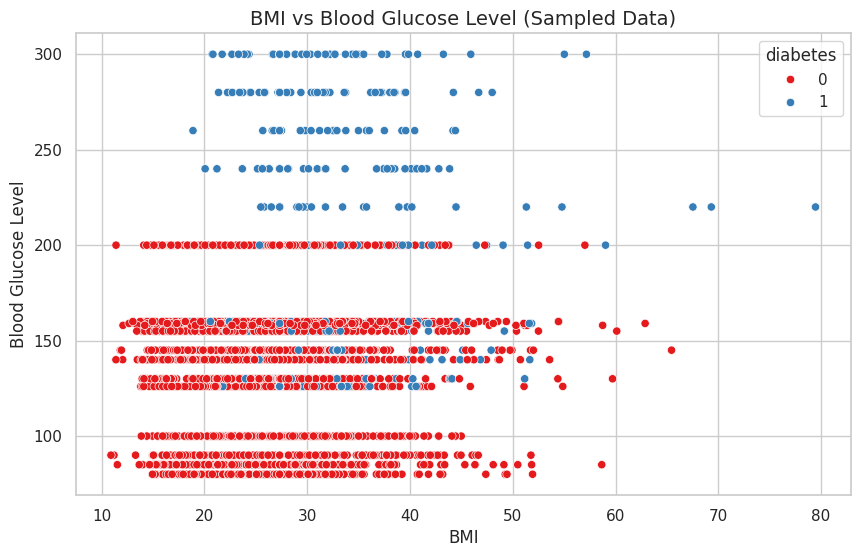

In [12]:
import seaborn as sns

# Assuming 'diabetes_data_cleaned' is the dataframe name after data cleaning
selected_variables = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level', 'diabetes']
sns.pairplot(diabetes_data_cleaned[selected_variables], hue='diabetes', plot_kws={'alpha': 0.6}, palette='viridis')
plt.suptitle('Pair Plot of Key Variables Segmented by Diabetes Status', size=24, y=1.02)
plt.show()

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot BMI vs. Blood Glucose Level
sns.scatterplot(x='bmi', y='blood_glucose_level', hue='diabetes', data=diabetes_data_cleaned, ax=axes[0], palette='Set1', alpha=0.6)
axes[0].set_title('BMI vs. Blood Glucose Level by Diabetes Status', fontsize=14)
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Blood Glucose Level')

# Plot BMI vs. HbA1c Level
sns.scatterplot(x='bmi', y='HbA1c_level', hue='diabetes', data=diabetes_data_cleaned, ax=axes[1], palette='Set2', alpha=0.6)
axes[1].set_title('BMI vs. HbA1c Level by Diabetes Status', fontsize=14)
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('HbA1c Level')

# Plot Blood Glucose Level vs. HbA1c Level
sns.scatterplot(x='blood_glucose_level', y='HbA1c_level', hue='diabetes', data=diabetes_data_cleaned, ax=axes[2], palette='Set3', alpha=0.6)
axes[2].set_title('Blood Glucose Level vs. HbA1c Level by Diabetes Status', fontsize=14)
axes[2].set_xlabel('Blood Glucose Level')
axes[2].set_ylabel('HbA1c Level')

plt.tight_layout()
plt.show()

# Sample the data to reduce load and simplify the plots
sampled_data = diabetes_data_cleaned.sample(n=5000, random_state=1)

# Create simpler scatter plots with sampled data
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plotting BMI vs Blood Glucose Level
sns.scatterplot(data=sampled_data, x='bmi', y='blood_glucose_level', hue='diabetes', palette='Set1', ax=axes[0])
axes[0].set_title('Sampled Data: BMI vs Blood Glucose Level', fontsize=14)
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Blood Glucose Level')

# Plotting BMI vs HbA1c Level
sns.scatterplot(data=sampled_data, x='bmi', y='HbA1c_level', hue='diabetes', palette='Set2', ax=axes[1])
axes[1].set_title('Sampled Data: BMI vs HbA1c Level', fontsize=14)
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('HbA1c Level')

# Plotting Blood Glucose Level vs HbA1c Level
#sns.scatterplot(data=sampled_data, x='blood_glucose_level', y='HbA1c_level', hue='diabetes', palette='Set3', ax=axes[2])
sns.scatterplot(x='blood_glucose_level', y='HbA1c_level', hue='diabetes', data=diabetes_data_cleaned, ax=axes[2], palette=['gold', 'black'], alpha=0.6)

axes[2].set_title('Sampled Data: Blood Glucose Level vs HbA1c Level', fontsize=14)
axes[2].set_xlabel('Blood Glucose Level')
axes[2].set_ylabel('HbA1c Level')

plt.tight_layout()
plt.show()

# Create a basic scatter plot for BMI vs Blood Glucose Level using a smaller subset
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_data, x='bmi', y='blood_glucose_level', hue='diabetes', palette='Set1')
plt.title('BMI vs Blood Glucose Level (Sampled Data)', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.show()


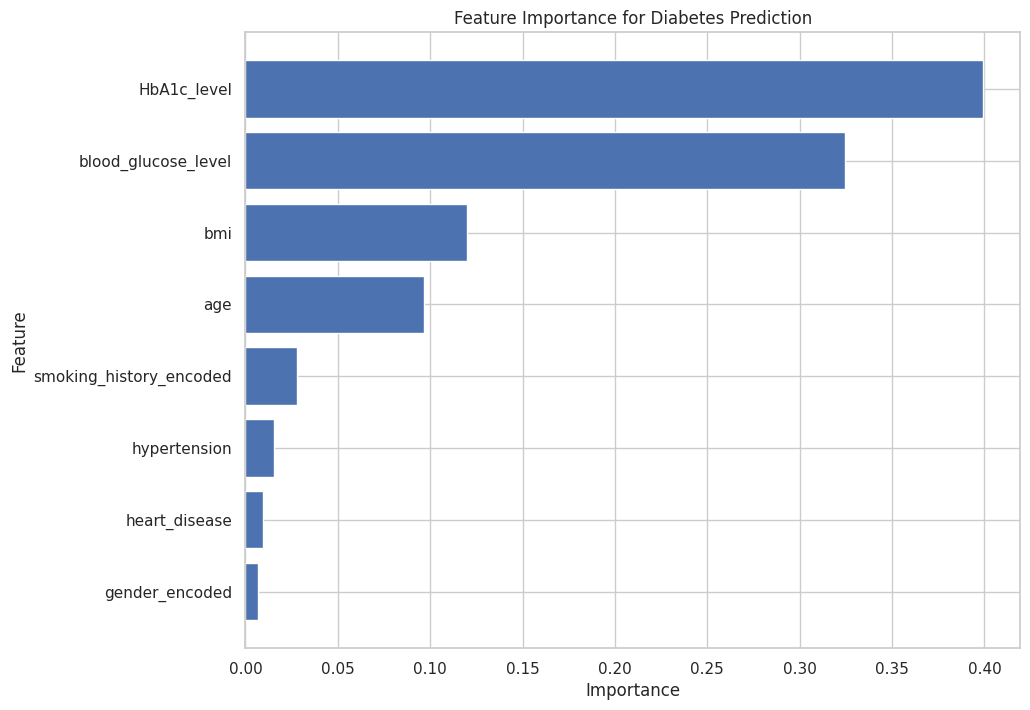

,Feature,Importance
6,gender_encoded,0.006588
2,heart_disease,0.009386
1,hypertension,0.015696
7,smoking_history_encoded,0.027688
0,age,0.096853
3,bmi,0.120008
5,blood_glucose_level,0.324320
4,HbA1c_level,0.399461


In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
diabetes_data_cleaned = pd.read_csv('diabetes_prediction_dataset.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
diabetes_data_cleaned['gender_encoded'] = label_encoder.fit_transform(diabetes_data_cleaned['gender'])
diabetes_data_cleaned['smoking_history_encoded'] = label_encoder.fit_transform(diabetes_data_cleaned['smoking_history'])

# Separate features (X) and target variable (y)
X = diabetes_data_cleaned.drop(['diabetes', 'gender', 'smoking_history'], axis=1)
y = diabetes_data_cleaned['diabetes']

# Initialize Random Forest classifier
rf_classifier_diabetes = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier
rf_classifier_diabetes.fit(X, y)

# Get feature importances
feature_importances_diabetes = rf_classifier_diabetes.feature_importances_

# Create a DataFrame to display feature importances
importance_df_diabetes = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_diabetes})

# Sort the DataFrame by feature importance in descending order
importance_df_diabetes = importance_df_diabetes.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df_diabetes['Feature'], importance_df_diabetes['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Diabetes Prediction')
plt.show()

print()
feature_importances_diabetes
importance_df_diabetes